In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv(r"D:\Machine Learning\Sample Project1\Notes Notebooks\Working_Data\diabetes_dataset.csv")

In [3]:
len(dt)

100000

In [4]:
dt.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
X = dt.drop("diabetes",axis=1)
y = dt["diabetes"]

In [6]:
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(sparse_output=False)
clt = ColumnTransformer([("ohe",ohe,["gender","smoking_history"])],remainder="passthrough")
clt.fit(X)
clt.set_output(transform="pandas")
X = clt.transform(X)
X.head()

,ohe__gender_Female,ohe__gender_Male,ohe__gender_Other,ohe__smoking_history_No Info,ohe__smoking_history_current,ohe__smoking_history_ever,ohe__smoking_history_former,ohe__smoking_history_never,ohe__smoking_history_not current,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__bmi,remainder__HbA1c_level,remainder__blood_glucose_level
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0,1,25.19,6.6,140
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0,0,27.32,6.6,80
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0,0,27.32,5.7,158
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0,0,23.45,5.0,155
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,1,1,20.14,4.8,155


In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_first,X_test,y_first,y_test = train_test_split(X,y,test_size=0.15)

In [9]:
X_first.head()

,ohe__gender_Female,ohe__gender_Male,ohe__gender_Other,ohe__smoking_history_No Info,ohe__smoking_history_current,ohe__smoking_history_ever,ohe__smoking_history_former,ohe__smoking_history_never,ohe__smoking_history_not current,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__bmi,remainder__HbA1c_level,remainder__blood_glucose_level
71584,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0,0,27.32,5.7,159
98962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0,0,0,27.32,6.1,130
74509,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0,0,15.97,4.5,85
86798,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,0,0,27.32,4.0,90
54930,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,0,0,27.32,4.0,140


In [10]:
y_first.value_counts()

0    77784
1     7216
Name: diabetes, dtype: int64

In [11]:
np.random.seed(42)
X_train,X_valid,y_train,y_valid = train_test_split(X_first,y_first,test_size=0.15)

In [25]:
y_valid.value_counts()

0    11711
1     1039
Name: diabetes, dtype: int64

In [26]:
np.random.seed(4100)
from sklearn.linear_model import SGDClassifier

sget = SGDClassifier()
sget.fit(X_train,y_train)
y_preds = sget.predict(X_valid)
print(sget.score(X_valid,y_valid))

0.960156862745098


In [29]:
from sklearn.model_selection import cross_val_score

cv = cross_val_score(sget,X_first,y_first,cv=10)
print(np.mean(cv))

0.9479647058823529


0.960156862745098
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11711
           1       0.83      0.64      0.72      1039

    accuracy                           0.96     12750
   macro avg       0.90      0.81      0.85     12750
weighted avg       0.96      0.96      0.96     12750



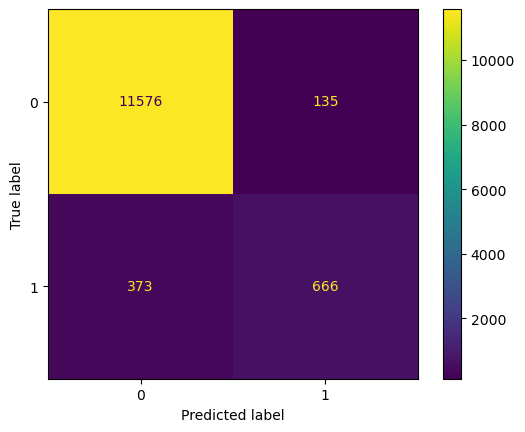

In [24]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

0.9539529411764706
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11711
           1       0.74      0.71      0.72      1039

    accuracy                           0.96     12750
   macro avg       0.86      0.84      0.85     12750
weighted avg       0.96      0.96      0.96     12750



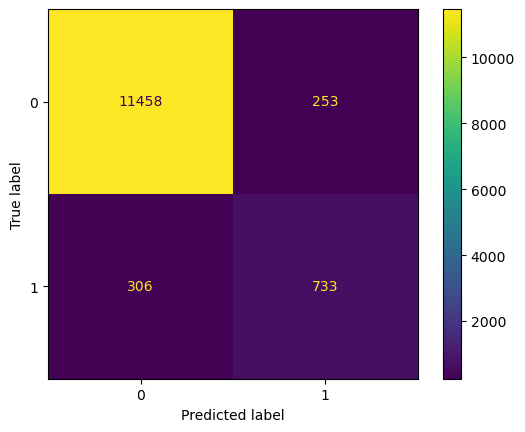

In [42]:
 np.random.seed(4100)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sget = SGDClassifier(learning_rate='adaptive',eta0=0.01)
sget.fit(X_train,y_train)
y_preds = sget.predict(X_valid)
cv = cross_val_score(sget,X_first,y_first,cv=10)
print(np.mean(cv))
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

0.9463647058823529
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11711
           1       0.83      0.64      0.72      1039

    accuracy                           0.96     12750
   macro avg       0.90      0.81      0.85     12750
weighted avg       0.96      0.96      0.96     12750



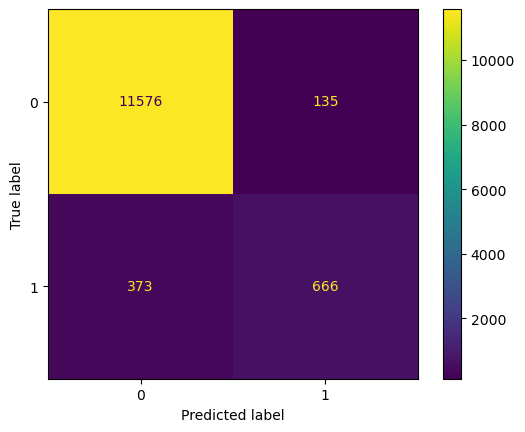

In [48]:
np.random.seed(4100)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sget = SGDClassifier(warm_start=True)
sget.fit(X_train,y_train)
y_preds = sget.predict(X_valid)
cv = cross_val_score(sget,X_first,y_first,cv=10)
print(np.mean(cv))
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

0.9501058823529412
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11711
           1       0.68      0.72      0.70      1039

    accuracy                           0.95     12750
   macro avg       0.83      0.84      0.83     12750
weighted avg       0.95      0.95      0.95     12750



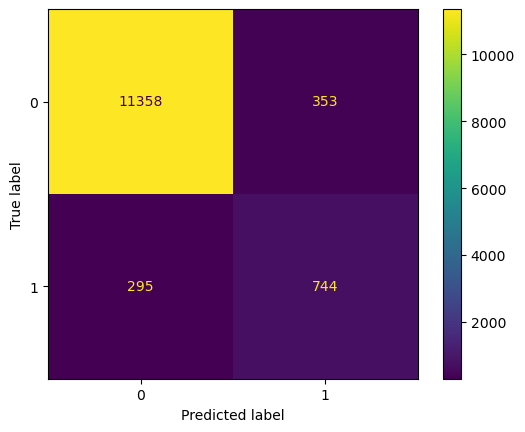

In [53]:
np.random.seed(4100)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sget = SGDClassifier(alpha=0.001)
sget.fit(X_train,y_train)
y_preds = sget.predict(X_valid)
cv = cross_val_score(sget,X_first,y_first,cv=10)
print(np.mean(cv))
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

0.9474117647058824
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11711
           1       0.69      0.65      0.67      1039

    accuracy                           0.95     12750
   macro avg       0.83      0.81      0.82     12750
weighted avg       0.95      0.95      0.95     12750



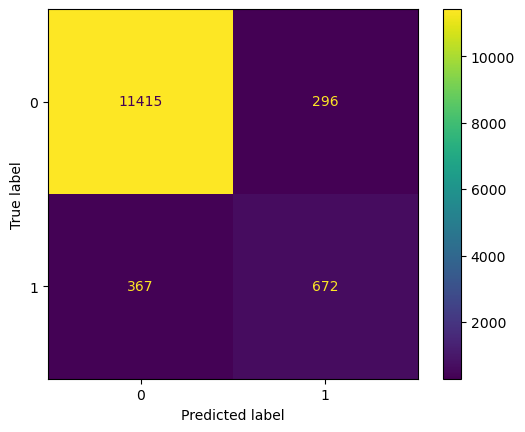

In [55]:
np.random.seed(4100)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sget = SGDClassifier(learning_rate='adaptive',eta0=0.01,alpha=0.001,warm_start=True)
sget.fit(X_train,y_train)
y_preds = sget.predict(X_valid)
cv = cross_val_score(sget,X_first,y_first,cv=10)
print(np.mean(cv))
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

params = {"max_iter":[15000,20000,30000],
          "warm_start":[True,False]}

sgd = SGDClassifier(learning_rate='adaptive',alpha=0.0001,eta0=0.01)

est = GridSearchCV(estimator=sgd,
                   param_grid=params,
                   verbose = 3)

est.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...max_iter=15000, warm_start=True;, score=0.951 total time=   0.5s
[CV 2/5] END ...max_iter=15000, warm_start=True;, score=0.956 total time=   0.7s
[CV 3/5] END ...max_iter=15000, warm_start=True;, score=0.956 total time=   0.6s
[CV 4/5] END ...max_iter=15000, warm_start=True;, score=0.952 total time=   0.6s
[CV 5/5] END ...max_iter=15000, warm_start=True;, score=0.955 total time=   0.5s
[CV 1/5] END ..max_iter=15000, warm_start=False;, score=0.951 total time=   0.5s
[CV 2/5] END ..max_iter=15000, warm_start=False;, score=0.956 total time=   0.5s
[CV 3/5] END ..max_iter=15000, warm_start=False;, score=0.956 total time=   0.5s
[CV 4/5] END ..max_iter=15000, warm_start=False;, score=0.952 total time=   0.4s
[CV 5/5] END ..max_iter=15000, warm_start=False;, score=0.953 total time=   0.6s
[CV 1/5] END ...max_iter=20000, warm_start=True;, score=0.951 total time=   0.7s
[CV 2/5] END ...max_iter=20000, warm_start=True;,

GridSearchCV(estimator=SGDClassifier(eta0=0.01, learning_rate='adaptive'),
             param_grid={'max_iter': [15000, 20000, 30000],
                         'warm_start': [True, False]},
             verbose=3)

In [79]:
est.best_params_

{'max_iter': 20000, 'warm_start': True}

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11711
           1       0.74      0.71      0.72      1039

    accuracy                           0.96     12750
   macro avg       0.86      0.84      0.85     12750
weighted avg       0.96      0.96      0.96     12750



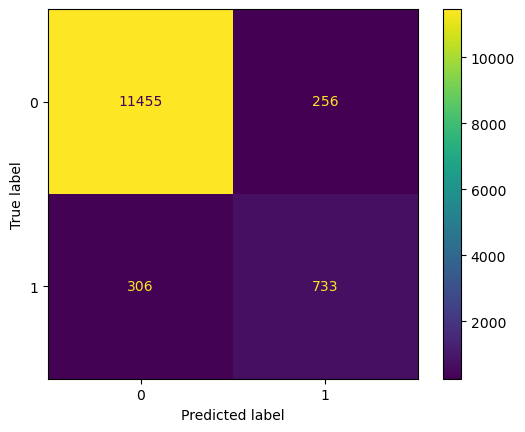

In [80]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

y_preds = est.predict(X_valid)
print(classification_report(y_valid,y_preds))
ConfusionMatrixDisplay.from_predictions(y_valid,y_preds)

In [81]:
len(X_train),len(X_valid),len(X_test),len(y_train),len(y_valid),len(y_test)

(72250, 12750, 15000, 72250, 12750, 15000)

In [82]:
y_train.value_counts()

0    66073
1     6177
Name: diabetes, dtype: int64

In [83]:
y_valid.value_counts()

0    11711
1     1039
Name: diabetes, dtype: int64